
**Text mining**, also referred to as text data mining, resembles the process of data mining, but with a specific focus on textual information. The goal of text mining is to extract high-quality information from text. It involves a series of processes and methods that transform unstructured text into structured data, enabling the discovery of meaningful patterns and insights.

In the realm of text mining, a significant portion of the data encountered is typically unstructured and composed of human-readable text. This necessitates preprocessing the data to render it suitable for algorithmic analysis. This guide is designed to introduce you to the initial steps of text preprocessing using the Natural Language Toolkit (NLTK), setting the groundwork for its application in future text mining endeavors. Additionally, the tutorial will cover fundamental methods of text analysis and demonstrate how to generate visual representations of textual data. This foundational knowledge in text preprocessing is vital for effectively managing and extracting insights from unstructured text data in text mining projects.

By the end of this tutorial, you’ll know how to:

**Find text to analyze**

**Preprocess your text for analysis**

**Analyze your text**

**Create visualizations based on your analysis**

Here we will be using **NLTK** package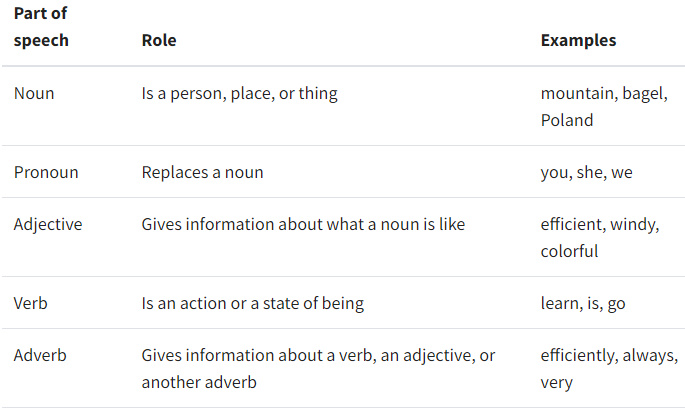

In [ ]:
pip install nltk==3.5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 9.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for nltk: filename=nltk-3.5-py3-none-any.whl size=1434677 sha256=bdff5662635912e8cb25cf8859b83ff46e91d5147f1bfec84c401b0aa9f6c7cf
  Stored in directory: /root/.cache/pip/wheels/35/ab/82/f9667f6f884d272670a15382599a9c753a1dfdc83f7412e37d
Successfully built nltk
  Attempting uninstall: nltk
    Found existing installation: nltk 3.8.1
    Uninstalling nltk-3.8.1:
      Successfully uninstalled nltk-3.8.1


In order to create visualizations for named entity recognition, you’ll also need to install **NumPy** and **Matplotlib**:

In [ ]:
pip install numpy matplotlib

**Tokenizing**

Tokenizing means breaking down text into smaller parts like words or sentences. This makes it easier to work with text because these small parts are still clear and meaningful on their own, even without the rest of the text. Tokenizing is the first step in organizing messy or unstructured data into a clear, structured form that's simpler to study and understand.

In text analysis, there are two main approaches to breaking down text: tokenizing by **word and tokenizing by sentence**.
Each method offers unique insights:

**Tokenizing by Word:** This involves breaking the text into individual words. Words are the fundamental building blocks of language, representing the smallest units that carry meaning independently. By examining words, one can identify frequently occurring terms. For instance, in analyzing job advertisements, the frequent appearance of "Python" might indicate a strong demand for skills in this programming language. However, to fully understand the implications, further analysis is required.

**Tokenizing by Sentence:** This method segments the text into sentences. By doing so, it allows for the examination of how words interact and relate to each other within a broader context. For example, if the word "Python" is surrounded by negative terms in a job ad, it might suggest a negative attitude towards Python programming. Alternatively, if the context includes more terms related to herpetology (the study of reptiles) rather than software development, it could imply that the "Python" in question is actually referring to the snake, not the programming language. Sentence tokenization helps in understanding the context and nuances surrounding word usage in the text.

Here’s how to import the relevant parts of NLTK so you can tokenize by word and by sentence:




In [1]:
from nltk.tokenize import sent_tokenize, word_tokenize
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

Now that you've brought in the necessary tools, you can start tokenizing a piece of text. Here's a quote from the book Dune for this purpose

In [ ]:
example_string = """Muad'Dib learned rapidly because his first training was in how to learn. And the first lesson of all was the basic trust that he could learn. It's shocking to find how many people do not believe they can learn, and how many more believe learning to be difficult."""

You can use sent_tokenize() to split up example_string into sentences:

In [2]:
example_string = """RCB as won IPL 2024 in its dream. Avengers are the part of the team who help to win IPL. It's shocking to hear that Chritopher Nolan should Direct Avengers in the future."""

In [3]:
sent_tokenize(example_string)

['RCB as won IPL 2024 in its dream.',
 'Avengers are the part of the team who help to win IPL.',
 "It's shocking to hear that Chritopher Nolan should Direct Avengers in the future."]

Tokenizing example_string by sentence gives you a list of three strings that are sentences:

"Muad'Dib learned rapidly because his first training was in how to learn.
"
'And the first lesson of all was the basic trust that he could learn.'
"It's shocking to find how many people do not believe they can learn, and how many more believe learning to be difficult."

Now try tokenizing example_string by word:

In [4]:
word_tokenize(example_string)

['RCB',
 'as',
 'won',
 'IPL',
 '2024',
 'in',
 'its',
 'dream',
 '.',
 'Avengers',
 'are',
 'the',
 'part',
 'of',
 'the',
 'team',
 'who',
 'help',
 'to',
 'win',
 'IPL',
 '.',
 'It',
 "'s",
 'shocking',
 'to',
 'hear',
 'that',
 'Chritopher',
 'Nolan',
 'should',
 'Direct',
 'Avengers',
 'in',
 'the',
 'future',
 '.']

NLTK processed your text and identified various strings as words. Examples include:


"Muad'Dib"

'training'

'how'

However, it also categorized some other strings as words, which might not typically be considered as such:


"'s"

','

'.'

Notice how the phrase "It's" was divided at the apostrophe, resulting in 'It' and "'s"? This is because NLTK recognizes 'It' and "'s" (a shortened form of “is”) as two distinct words and treats them separately. On the other hand, "Muad'Dib" remained as a single unit. The reason for this is that "Muad'Dib" is not a recognized contraction like "It's", so NLTK didn’t split it into separate words and kept it whole.

**Filtering Stop Words**

**Stop words** are the words in text data that are typically excluded during processing because they offer little meaningful content on their own. These are usually very common words such as 'in', 'is', and 'an'. Since they often don't contribute significantly to the overall meaning of the text, they are filtered out.

To begin filtering out these stop words using NLTK, here's how you can import the necessary components:

In [5]:
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [6]:
# Here’s a quote from Worf that you can filter:
worf_quote = "Sir, I protest. I am not a merry man!"

In [7]:
# Now tokenize worf_quote by word and store the resulting list in words_in_quote:
words_in_quote = word_tokenize(worf_quote)
words_in_quote



['Sir', ',', 'I', 'protest', '.', 'I', 'am', 'not', 'a', 'merry', 'man', '!']

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


You have a list of the words in worf_quote, so the next step is to create a set of stop words to filter words_in_quote. For this example, you’ll need to focus on stop words in "english":

In [9]:
stop_words = set(stopwords.words("english"))

Next, create an empty list to hold the words that make it past the filter:

In [10]:
filtered_list = []

You created an empty list, filtered_list, to hold all the words in words_in_quote that aren’t stop words. Now you can use stop_words to filter words_in_quote:

In [11]:
for word in words_in_quote:
  if word.casefold() not in stop_words:
    filtered_list.append(word)


You looped through each word in words_in_quote using a for loop and added only those words to filtered_list that were not considered stop words. By applying .casefold() to each word, you ensured that the comparison was case-insensitive, as the list of stop words obtained from stopwords.words('english') in NLTK contains only lowercase words.

Another approach to achieve the same result is by using a list comprehension. This method can quickly create a list of words from your text that are not classified as stop words.

In [12]:
filtered_list = [word for word in words_in_quote if word.casefold() not in stop_words]

When you use a list comprehension, you don’t create an empty list and then add items to the end of it. Instead, you define the list and its contents at the same time.
Take a look at the words that ended up in filtered_list:

In [13]:
filtered_list

['Sir', ',', 'protest', '.', 'merry', 'man', '!']

You filtered out a few words like 'am' and 'a', but you also filtered out 'not', which does affect the overall meaning of the sentence.

Words like 'I' and 'not' may seem too important to filter out, and depending on what kind of analysis you want to do, they can be. Here’s why:

'I' is a pronoun, which are context words rather than content words:

Content words give you information about the topics covered in the text or the sentiment that the author has about those topics.

Context words give you information about writing style. You can observe patterns in how authors use context words in order to quantify their writing style. Once you’ve quantified their writing style, you can analyze a text written by an unknown author to see how closely it follows a particular writing style so you can try to identify who the author is.

'not' is technically an adverb but has still been included in NLTK’s list of stop words for English. If you want to edit the list of stop words to exclude 'not' or make other changes, then you can download it.

So, 'I' and 'not' can be important parts of a sentence, but it depends on what you’re trying to learn from that sentence.



**Stemming**

**Stemming** is a technique in text processing where words are reduced to their base or root form. This root form represents the essential meaning of the word. For instance, both "helping" and "helper" have the same root, "help." By stemming, you focus on the fundamental meaning of the word rather than its specific usage in different contexts. NLTK provides several stemmers, and one of the most commonly used is the Porter stemmer.

To begin using stemming in NLTK, here's how you can import the necessary components:

In [14]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

Now that you’re done importing, you can create a stemmer with PorterStemmer():

In [15]:
stemmer = PorterStemmer()
#The next step is for you to create a string to stem. Here’s one you can use:

In [16]:
string_for_stemming = """
... The crew of the USS Discovery discovered many discoveries.
... Discovering is what explorers do."""

Before you can stem the words in that string, you need to separate all the words in it:

In [17]:
words = word_tokenize(string_for_stemming)

Now that you have a list of all the tokenized words from the string, take a look at what’s in words:

In [18]:
words

['The',
 'crew',
 'of',
 'the',
 'USS',
 'Discovery',
 'discovered',
 'many',
 'discoveries',
 '.',
 'Discovering',
 'is',
 'what',
 'explorers',
 'do',
 '.']

Create a list of the stemmed versions of the words in words by using stemmer.stem() in a list comprehension:

In [19]:
stemmed_words = [stemmer.stem(word) for word in words]

Take a look at what’s in stemmed_words:



In [20]:
stemmed_words

['the',
 'crew',
 'of',
 'the',
 'uss',
 'discoveri',
 'discov',
 'mani',
 'discoveri',
 '.',
 'discov',
 'is',
 'what',
 'explor',
 'do',
 '.']

Here’s what happened to all the words that started with 'discov' or 'Discov':

(Original word	,      Stemmed version)

('Discovery'	,        'discoveri')

('discovered'	,       'discov')

('discoveries'	  ,      'discoveri')

('Discovering'	 ,       'discov')

Those results look a little inconsistent. Why would 'Discovery' give you 'discoveri' when 'Discovering' gives you 'discov'?

**Understemming** and **overstemming** are two ways stemming can go wrong:

Understemming happens when two related words should be reduced to the same stem but aren’t. This is a false negative.
Overstemming happens when two unrelated words are reduced to the same stem even though they shouldn’t be. This is a false positive.

The Porter stemming algorithm dates from 1979, so it’s a little on the older side. The Snowball stemmer, which is also called Porter2, is an improvement on the original and is also available through NLTK, so you can use that one in your own projects. It’s also worth noting that the purpose of the Porter stemmer is not to produce complete words but to find variant forms of a word.

Fortunately, you have some other ways to reduce words to their core meaning, such as lemmatizing, which you’ll see later in this tutorial. But first, we need to cover parts of speech.

**Tagging Parts of Speech**

Part of speech refers to the grammatical categories that words fall into based on their function in sentences. The process of assigning these categories to words in a text is known as Part of Speech (POS) tagging. This task involves labeling each word according to its grammatical role, such as noun, verb, adjective, etc.
In English, there are eight parts of speech:

(Part of speech;	Role;	Examples)
(Noun;	Is a person, place, or thing;	mountain, bagel, Poland)
(Pronoun;	Replaces a noun;	you, she, we)
(Adjective;	Gives information about what a noun is like;	efficient, windy, colorful)
(Verb;	Is an action or a state of being;	learn, is, go)
(Adverb;	Gives information about a verb, an adjective, or another adverb;	efficiently, always, very)
(Preposition;	Gives information about how a noun or pronoun is connected to another word;	from, about, at)
(Conjunction;	Connects two other words or phrases;	so, because, and)
(Interjection;	Is an exclamation;	yay, ow, wow)
Some sources also include the category articles (like “a” or “the”) in the list of parts of speech, but other sources consider them to be adjectives. NLTK uses the word determiner to refer to articles.

Here’s how to import the relevant parts of NLTK in order to tag parts of speech:


In [23]:
pip install SnowballStemmer

In [27]:
stemmer = 'SnowballStemmer()'
#The next step is for you to create a string to stem. Here’s one you can use:

In [28]:
from nltk.tokenize import word_tokenize

In [33]:
string_for_stemming = """
... The crew of the USS Discovery discovered many discoveries.
... Discovering is what explorers do."""

In [34]:
words = word_tokenize(string_for_stemming)

In [35]:
words

['The',
 'crew',
 'of',
 'the',
 'USS',
 'Discovery',
 'discovered',
 'many',
 'discoveries',
 '.',
 'Discovering',
 'is',
 'what',
 'explorers',
 'do',
 '.']

In [37]:
stemmed_words = [stemmer.stem(word) for word in words]


In [38]:
stemmed_words

['the',
 'crew',
 'of',
 'the',
 'uss',
 'discoveri',
 'discov',
 'mani',
 'discoveri',
 '.',
 'discov',
 'is',
 'what',
 'explor',
 'do',
 '.']

Now create some text to tag. You can use this Carl Sagan quote:

In [40]:
from nltk.stem import LancasterStemmer

In [41]:
stemmer = LancasterStemmer()

In [ ]:
sagan_quote = """If you wish to make an apple pie from scratch, you must first invent the universe."""

Use word_tokenize to separate the words in that string and store them in a list:

In [ ]:
words_in_sagan_quote = word_tokenize(sagan_quote)

Now call nltk.pos_tag() on your new list of words:

In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')

nltk.pos_tag(words_in_sagan_quote)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


[('If', 'IN'),
 ('you', 'PRP'),
 ('wish', 'VBP'),
 ('to', 'TO'),
 ('make', 'VB'),
 ('an', 'DT'),
 ('apple', 'NN'),
 ('pie', 'NN'),
 ('from', 'IN'),
 ('scratch', 'NN'),
 (',', ','),
 ('you', 'PRP'),
 ('must', 'MD'),
 ('first', 'VB'),
 ('invent', 'VB'),
 ('the', 'DT'),
 ('universe', 'NN'),
 ('.', '.')]

All the words in the quote are now in a separate tuple, with a tag that represents their part of speech. But what do the tags mean? Here’s how to get a list of tags and their meanings:

In [ ]:

nltk.download('tagsets')

nltk.help.upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Unzipping help/tagsets.zip.


Now that you know what the POS tags mean, you can see that your tagging was fairly successful:

'pie' was tagged NN because it’s a singular noun.

'you' was tagged PRP because it’s a personal pronoun.

'invent' was tagged VB because it’s the base form of a verb.

But how would NLTK handle tagging the parts of speech in a text that is basically gibberish? Jabberwocky is a nonsense poem that doesn’t technically mean much but is still written in a way that can convey some kind of meaning to English speakers.

Make a string to hold an excerpt from this poem:

In [ ]:
jabberwocky_excerpt = """
... 'Twas brillig, and the slithy toves did gyre and gimble in the wabe:
... all mimsy were the borogoves, and the mome raths outgrabe."""

Use word_tokenize to separate the words in the excerpt and store them in a list:

In [ ]:
words_in_excerpt = word_tokenize(jabberwocky_excerpt)

Call nltk.pos_tag() on your new list of words:

In [ ]:
nltk.pos_tag(words_in_excerpt)

[("'Twas", 'CD'),
 ('brillig', 'NN'),
 (',', ','),
 ('and', 'CC'),
 ('the', 'DT'),
 ('slithy', 'JJ'),
 ('toves', 'NNS'),
 ('did', 'VBD'),
 ('gyre', 'NN'),
 ('and', 'CC'),
 ('gimble', 'JJ'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('wabe', 'NN'),
 (':', ':'),
 ('all', 'DT'),
 ('mimsy', 'NNS'),
 ('were', 'VBD'),
 ('the', 'DT'),
 ('borogoves', 'NNS'),
 (',', ','),
 ('and', 'CC'),
 ('the', 'DT'),
 ('mome', 'JJ'),
 ('raths', 'NNS'),
 ('outgrabe', 'RB'),
 ('.', '.')]

Accepted English words like 'and' and 'the' were correctly tagged as a conjunction and a determiner, respectively. The gibberish word 'slithy' was tagged as an adjective, which is what a human English speaker would probably assume from the context of the poem as well.

**Lemmatizing**

Now that you’re up to speed on parts of speech, you can circle back to lemmatizing. Like stemming, lemmatizing reduces words to their core meaning, but it will give you a complete English word that makes sense on its own instead of just a fragment of a word like 'discoveri'.

Note: A lemma is a word that represents a whole group of words, and that group of words is called a lexeme.

For example, if you were to look up the word “blending” in a dictionary, then you’d need to look at the entry for “blend,” but you would find “blending” listed in that entry.

In this example, “blend” is the lemma, and “blending” is part of the lexeme. So when you lemmatize a word, you are reducing it to its lemma.
Here’s how to import the relevant parts of NLTK in order to start lemmatizing:

In [ ]:
from nltk.stem import WordNetLemmatizer

Create a lemmatizer to use:

In [ ]:
lemmatizer = WordNetLemmatizer()

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

Let’s start with lemmatizing a plural noun:

In [ ]:

lemmatizer.lemmatize("scarves")

'scarf'

"scarves" gave you 'scarf', so that’s already a bit more sophisticated than what you would have gotten with the Porter stemmer, which is 'scarv'. Next, create a string with more than one word to lemmatize:

In [ ]:
string_for_lemmatizing = "The friends of DeSoto love scarves."

Now tokenize that string by word:

In [ ]:
words = word_tokenize(string_for_lemmatizing)

Here’s your list of words:

In [ ]:
words

['The', 'friends', 'of', 'DeSoto', 'love', 'scarves', '.']

Create a list containing all the words in words after they’ve been lemmatized:

In [ ]:
lemmatized_words = [lemmatizer.lemmatize(word) for word in words]

In [ ]:
lemmatized_words

['The', 'friend', 'of', 'DeSoto', 'love', 'scarf', '.']

That looks right. The plurals 'friends' and 'scarves' became the singulars 'friend' and 'scarf'.

But what would happen if you lemmatized a word that looked very different from its lemma? Try lemmatizing "worst":

In [ ]:
lemmatizer.lemmatize("worst")

'worst'

You got the result 'worst' because lemmatizer.lemmatize() assumed that "worst" was a noun. You can make it clear that you want "worst" to be an adjective:

In [ ]:
lemmatizer.lemmatize("worst", pos="a")

'bad'

You used the 'n' parameter in the lemmatization process, which stands for noun, by default. However, to correctly process the word "worst," you specified it as an adjective by setting the parameter pos="a". Consequently, the lemmatizer transformed "worst" into "bad." This outcome is distinctly different from what stemming would produce. The reason for this change is that "worst" is the superlative form of the adjective "bad," and the lemmatization process reduces both superlative and comparative forms to their base lemmas.

With your newfound understanding of how to use NLTK for part-of-speech tagging, you can now tag words according to their parts of speech before lemmatizing them. This approach is especially useful for correctly handling homographs, which are words that have the same spelling but differ in meaning and can belong to different parts of speech. By tagging these words before lemmatizing them, you can ensure more accurate and context-appropriate processing.





